# Homework 8 Notebook
### Cody Costa, David Loi

In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.stats as stats

#### Load Data to Analyze

In [5]:
data = pd.read_csv('emnist-digits-test.csv', header=None, sep=',', dtype='uint')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Filter data into suggested usable set (sum of each row in the table)

In [6]:
row_sums = np.sum(data, axis=1)
row_sums

0        40376
1        21547
2        35224
3        39065
4        45823
         ...  
39995    30171
39996    30904
39997    37759
39998    23020
39999    32676
Length: 40000, dtype: uint64

#### Visualize Data

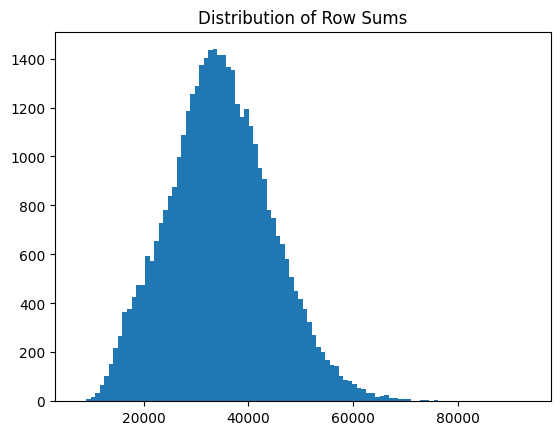

In [41]:
plt.hist(row_sums, bins=100)
plt.title('Distribution of Row Sums')
plt.show()

# Part 1
#### Compute Mean and Variance

In [31]:
MEAN = np.round(np.mean(row_sums), 1)
VARIANCE = np.round(np.var(row_sums), 1)

In [32]:
MEAN, VARIANCE

(34698.3, 99515279.6)

# Part 2
#### For a Sample Size of 50, Calculate 1000 random reps of the MEAN, and estimate the VARIANCE

In [9]:
sample_size = 50
num_runs = 1000

random_mean_vals = np.zeros(num_runs)
random_variance_vals = np.zeros(num_runs)

for j in range(num_runs):
    sample_set = np.zeros(sample_size)

    for k in range(sample_size):
        sample_set[k] = row_sums[np.random.randint(0, row_sums.shape[0])]

    random_mean_vals[j] = np.mean(sample_set)
    random_variance_vals[j] = np.var(sample_set)

In [10]:
random_mean_vals.shape, random_variance_vals.shape

((1000,), (1000,))

In [34]:
random_mean_vals

array([33867.36, 32864.02, 36368.94, 34426.9 , 35284.58, 38108.46,
       33424.42, 37674.92, 36331.22, 34740.82, 35649.5 , 37271.4 ,
       33918.06, 36455.2 , 34364.22, 36242.68, 34331.98, 34277.44,
       33745.86, 33157.9 , 34415.86, 35768.4 , 33141.04, 32678.2 ,
       34593.02, 34554.02, 32973.1 , 35447.3 , 32509.88, 34228.08,
       35085.38, 34082.04, 32855.64, 34055.08, 35295.38, 32719.84,
       35870.4 , 33396.28, 31345.56, 34546.3 , 34095.28, 37061.62,
       35924.42, 35614.3 , 36582.46, 34870.34, 35989.52, 35504.26,
       33115.82, 35358.2 , 35680.42, 33961.44, 34533.68, 35932.78,
       34059.96, 31898.52, 35016.22, 36039.52, 33908.18, 34574.32,
       34035.3 , 33654.78, 34414.82, 37483.56, 38382.72, 33412.04,
       34973.82, 35285.26, 33527.5 , 34141.6 , 34314.38, 37078.96,
       34612.72, 35886.4 , 35441.22, 36073.28, 36508.2 , 34913.38,
       33385.26, 34679.8 , 35845.22, 34734.22, 34077.38, 34358.72,
       34004.5 , 35409.74, 34047.84, 34670.82, 33803.46, 34029

In [12]:
random_variance_vals

array([1.02610036e+08, 7.41121334e+07, 9.57795419e+07, 9.75370509e+07,
       1.29907559e+08, 1.33283067e+08, 1.30881667e+08, 1.09208039e+08,
       1.17436638e+08, 7.73995639e+07, 9.05846515e+07, 6.64023352e+07,
       9.13659795e+07, 1.17321729e+08, 1.06944905e+08, 9.96781121e+07,
       9.67107119e+07, 8.16357446e+07, 8.36099732e+07, 9.69192343e+07,
       8.32704773e+07, 1.23599408e+08, 1.10171682e+08, 8.65200356e+07,
       7.64669025e+07, 8.15227645e+07, 1.07209752e+08, 8.23813712e+07,
       1.05480764e+08, 1.08362596e+08, 1.19210959e+08, 9.44811602e+07,
       1.23152823e+08, 8.78380654e+07, 1.20585838e+08, 8.31712683e+07,
       1.46658091e+08, 7.56673555e+07, 9.90372080e+07, 1.10605815e+08,
       8.27104548e+07, 8.31852350e+07, 8.81398639e+07, 7.25675655e+07,
       1.21990770e+08, 1.19028773e+08, 1.11424285e+08, 1.11397406e+08,
       6.92398352e+07, 1.25618184e+08, 1.07364568e+08, 7.45870313e+07,
       8.51449302e+07, 8.54353893e+07, 9.62173063e+07, 5.75441952e+07,
      

# Part 3
#### Estimate the sample mean variance

In [35]:
np.round(np.mean(random_variance_vals), 1)

97524153.5

#### Compute Error Between Global and Sample Variance

In [14]:
var_err = 100 * abs(VARIANCE - np.mean(random_variance_vals)) / VARIANCE
print(f'{np.round(var_err, 2)} % error')

2.0 % error


# Part 4
#### Compare Interval Estimate of the Sample Mean

#### method 1, plot results using estimated value of the sample mean variance
#### The below figure plots both normal distributions as a comparison between the exact and estimated data

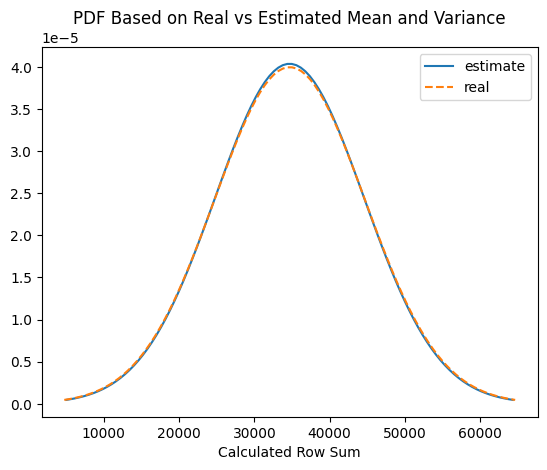

In [22]:
# plot a distribution of estimated values of the mean and variance

sigma = np.sqrt(np.mean(random_variance_vals))
mu = np.mean(random_mean_vals)

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))


# plot a distribution of the real values of the mean and variance

y = np.linspace(MEAN - 3 * np.sqrt(VARIANCE), MEAN + 3 * np.sqrt(VARIANCE), 100)
plt.plot(y, stats.norm.pdf(y, MEAN, np.sqrt(VARIANCE)), '--')


plt.legend(['estimate', 'real'])
plt.title('PDF Based on Real vs Estimated Mean and Variance')
plt.xlabel('Calculated Row Sum')
plt.show()

#### both graphs line up nicely, low error

#### method 2, graph a histogram of estimated sample mean values

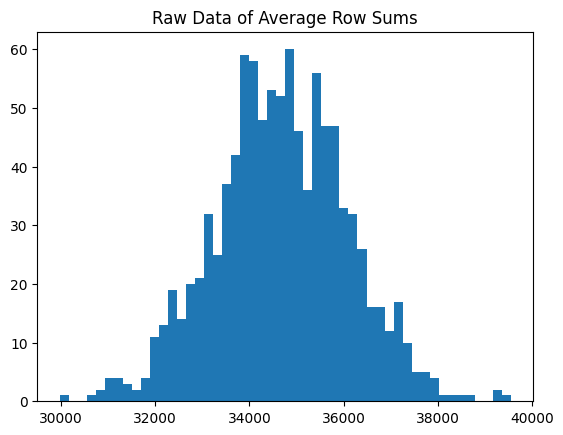

In [16]:
plt.hist(random_mean_vals, bins=50)
plt.title('Raw Data of Average Row Sums')
plt.show()

#### we can observe the histogram compared to the plot of the estimated data by scaling the graphs

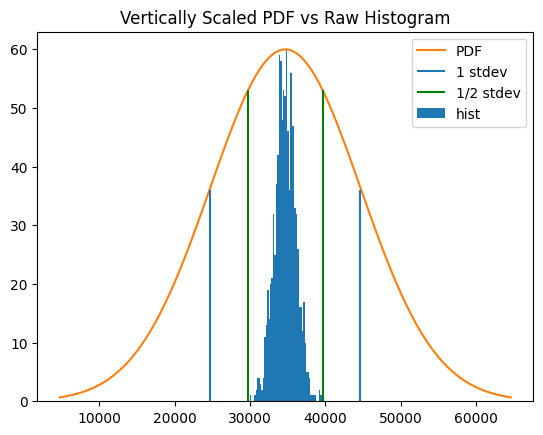

In [40]:
plt.hist(random_mean_vals, bins=50)
plt.plot(y, 15e5*stats.norm.pdf(y, MEAN, np.sqrt(VARIANCE)))

# mark +/- 1 stdev away from mean
plt.vlines([MEAN-np.sqrt(VARIANCE), MEAN+np.sqrt(VARIANCE)], ymin=0, ymax=36)

# mark +/- 1/2 stdev away from mean
plt.vlines([MEAN-np.sqrt(VARIANCE)/2, MEAN+np.sqrt(VARIANCE)/2], ymin=0, ymax=53, colors='green')

plt.title('Vertically Scaled PDF vs Raw Histogram')
plt.legend(['PDF', '1 stdev', '1/2 stdev', 'hist'])
plt.show()

#### Find where the extremes of the histogram fall on the plot

In [18]:
hist_min = np.min(random_mean_vals)
hist_max = np.max(random_mean_vals)

print(f'histogram min = {np.round(hist_min)},\t{np.round((hist_min - MEAN) / np.sqrt(VARIANCE), 2)}\tstdev\'s away from the mean')
print(f'histogram max = {np.round(hist_max)},\t{np.round((hist_max - MEAN) / np.sqrt(VARIANCE), 2)}\tstdev\'s away from the mean')

histogram min = 29978.0,	-0.47	stdev's away from the mean
histogram max = 39551.0,	0.49	stdev's away from the mean


# Part 5
#### Analysis of Results
#### On average, the extremes of the histogram fall within +/- 0.5 standard deviations from the true mean value of the distribution, therefore we can conclude our estimate of the mean and variance is accurate